# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Data Source: https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("titanicdataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: Name, sex, ticket, and cabin is in object data form. Rest of the data is in integer or float form. 

In [8]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<AxesSubplot:xlabel='Cabin', ylabel='count'>

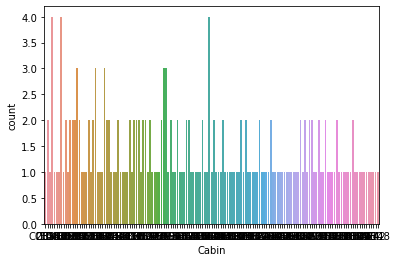

In [9]:
sns.countplot(df['Cabin'])

There are multiple cabins available in the Titanic, the number of passengers are not quite equal in all of them. 

Note: Since passesnger ID and name doesn't have that much impact on the determining whether person had survived or sinked. Hence we can drop it here only. 

In [12]:
df = df.drop(["PassengerId", "Name"], axis=1)

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


# Checking the missing and null values: 

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Observation: 
    
    1. Age does have 177 out of 891 values missing or null. 
    2. Cabin does have 687 out of 891 values missing or NaN. It can impact the training of the model further. So dropping here only. 
    3. Embarked does have 2 missing values. 

In [15]:
df = df.drop('Cabin', axis = 1)

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean)

In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean)

Above we have filled the age and embarked null values with the average of the overall column-wise data. 

In [18]:
#### Checking again whether missing values exsist in the dataset or not. 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
df = df.drop('Ticket', axis = 1)

In [29]:
df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,2.529742
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.800254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,3.000000


Observations: 
    
    1. The standard deviation of fare is 32 which actaully shows there is poistive skewness in the distribution. 
    2. Rest of the varaibles in terms of maximum value, median, and mean - it portrays data is normally ditributed. 

# Analyzing the target variable (SURVIVED):

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

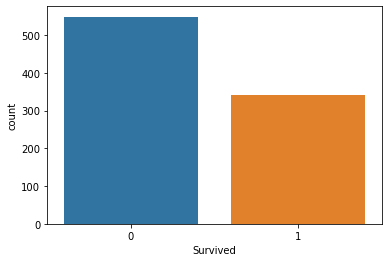

In [30]:
print(df['Survived'].value_counts())
sns.countplot(df['Survived'])

Only 342 passensgers survived and 549 passengers didn't. The data is imbalanced. 

# Analyzing the independent variables: 

1    577
0    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

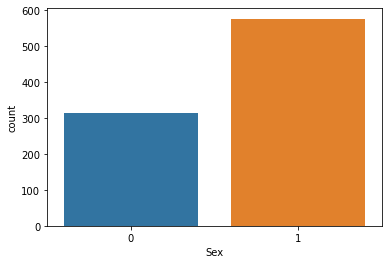

In [31]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

In the Titanic, there are 577 men and 314 women were there. 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

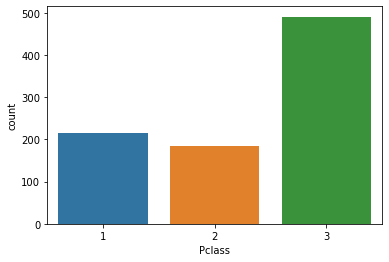

In [32]:
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])

As per the Passenger class, 200 passengers were there in first class, 180 passenegrs were there in second class, and around 500 passenegrs were there in third class. 

3    644
1    168
2     77
0      2
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

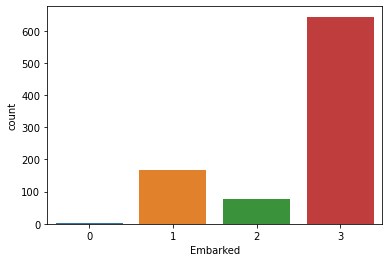

In [33]:
print(df['Embarked'].value_counts())
sns.countplot(df['Embarked'])

# Checking the correlation of the features: 

In [34]:
df.corr().T

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.173511
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.118492
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,0.071480
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,0.043351
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.230365
Embarked,-0.176509,0.173511,0.118492,0.071480,0.043351,-0.230365,1.000000


In [36]:
df.corr()['Survived'].sort_values(ascending = True)

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.176509
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

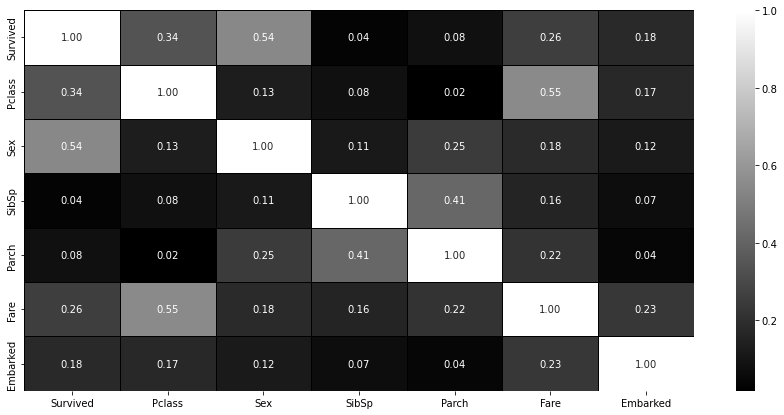

In [35]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f', cmap = 'gray')

From the correlation values estimated above: 
    
    1. Sex and passeneger class is highly negatively correlated with the survived varaiable. 
    2. Female is highly positivlt coorelated with the survived, and males arenegatively correlated. First class passenegers are rescued on top, rest of the two classes are given less priority. 
    3. Rest  of the variables is weakly correlated with the survived varaible but not siginificantly. 

# Multivariate analysis: Checking the relationship among the independent and dependent varaibles. 

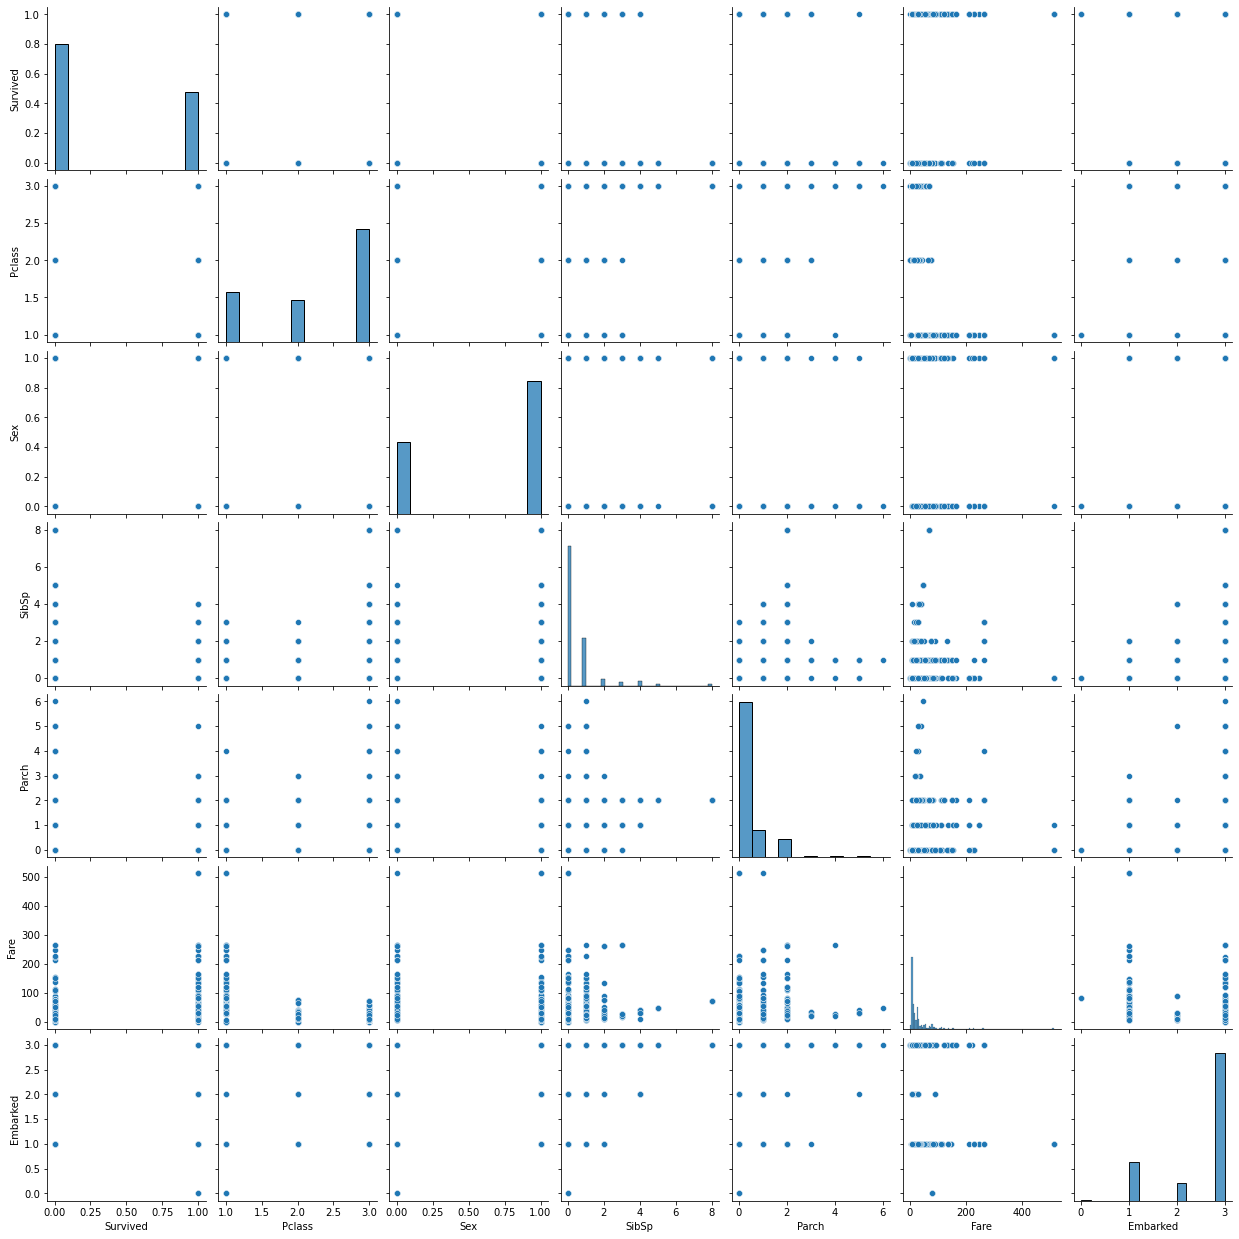

In [37]:
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()

In [113]:
df['Age'] = pd.to_numeric(df['Age'],errors = 'coerce')

In [40]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

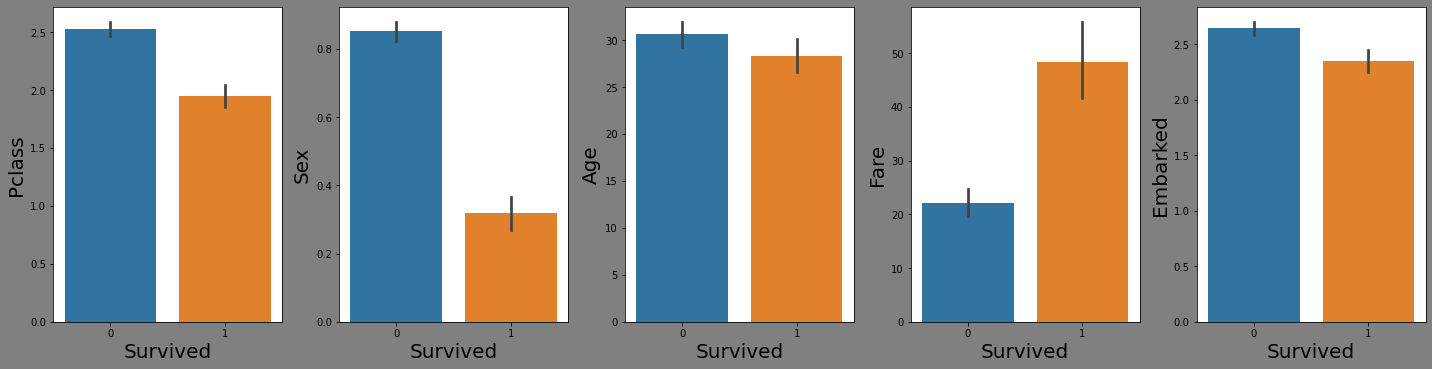

In [43]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnum=1
y = df['Survived']
X = df[['Pclass','Sex','Age','Fare','Embarked']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Observation: 
    
    1. Females has more survived in comparison to the males.
    2. Ones who paid high fare, survived more then those who paid less. 
    3. First and second passeneger class is given top priority in rescuing. 

# Checking the distribution now: 

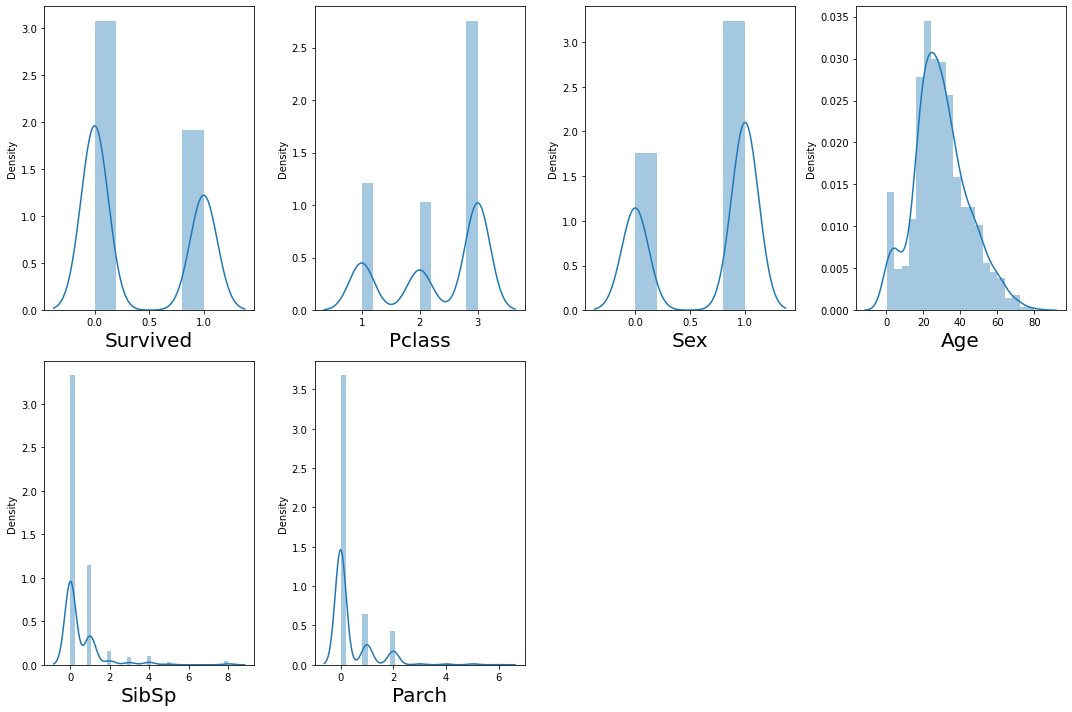

In [44]:
plt.figure(figsize = (15,10), facecolor = 'White')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <7: #here 6 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

The data is poitively skewed. Only age variables does have the normal bell-shaped distribution. 

# Outliers: 

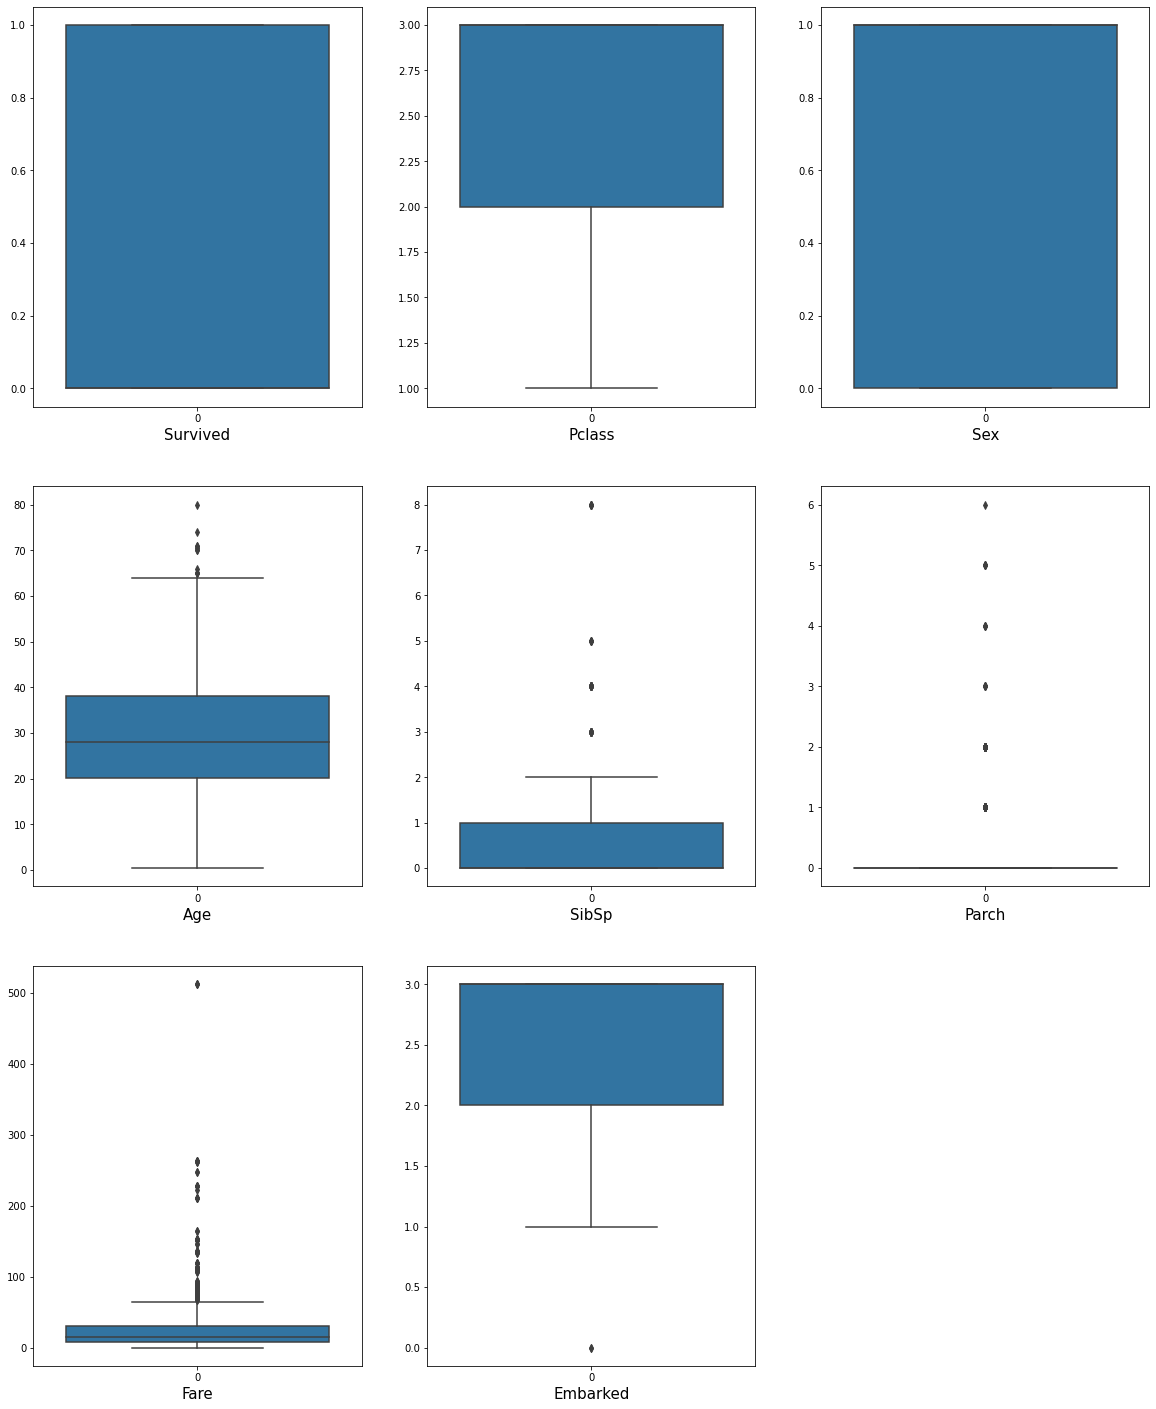

In [46]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=8: #here 8 is the number of features
        plt.subplot (3,3, graph)
        ax = sns.boxplot (data = df[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

Observations: 
    
    Age, sibsp, parch, fare, and embarked have the outliers in them. 

# Removing outliers: 

In [47]:
from scipy.stats import zscore 
z = np.abs(zscore(df))
print(z)

     Survived    Pclass       Sex  Age     SibSp     Parch      Fare  Embarked
0    0.789272  0.827377  0.737695  NaN  0.432793  0.473674  0.502445  0.587966
1    1.266990  1.566107  1.355574  NaN  0.432793  0.473674  0.786845  1.912644
2    1.266990  0.827377  1.355574  NaN  0.474545  0.473674  0.488854  0.587966
3    1.266990  1.566107  1.355574  NaN  0.432793  0.473674  0.420730  0.587966
4    0.789272  0.827377  0.737695  NaN  0.474545  0.473674  0.486337  0.587966
..        ...       ...       ...  ...       ...       ...       ...       ...
886  0.789272  0.369365  0.737695  NaN  0.474545  0.473674  0.386671  0.587966
887  1.266990  1.566107  1.355574  NaN  0.474545  0.473674  0.044381  0.587966
888  0.789272  0.827377  1.355574  NaN  0.432793  2.008933  0.176263  0.587966
889  1.266990  1.566107  0.737695  NaN  0.474545  0.473674  0.044381  1.912644
890  0.789272  0.827377  0.737695  NaN  0.474545  0.473674  0.492378  0.662339

[891 rows x 8 columns]


In [48]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  61,  68,  71,  86,  88, 118, 119,
       159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299,
       311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541,
       542, 557, 567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730,
       736, 737, 742, 774, 779, 787, 792, 813, 824, 829, 846, 850, 858,
       863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 7, 4, 4, 5, 6, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6,
       4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 6, 4, 4, 6, 5, 5, 5,
       5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 7, 4, 4, 5, 4,
       5], dtype=int64))


In [60]:
filter = ((z < 3).all(axis=1))

In [61]:
df_new = df[filter]

# Normalizing the distribution: 

In [66]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.270634
dtype: float64

In [132]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [133]:
x.dtypes

Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [134]:
from sklearn.preprocessing import power_transform
x= power_transform(x, method ='yeo-johnson')

<AxesSubplot:ylabel='Density'>

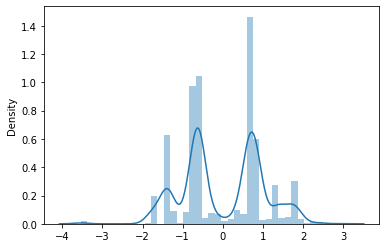

In [135]:
sns.distplot(x)

All skewnwss is removed from the varaibles, the distribution is normal. Keeping threshold -3 to 3. 

# Standard scaling: 

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)
X 

array([[ 0.82737724,  0.73769513, -0.53037664, -0.50244517,  0.58796609],
       [-1.56610693, -1.35557354,  0.57183099,  0.78684529, -1.91264387],
       [ 0.82737724, -1.35557354, -0.25482473, -0.48885426,  0.58796609],
       ...,
       [ 0.82737724, -1.35557354,         nan, -0.17626324,  0.58796609],
       [-1.56610693,  0.73769513, -0.25482473, -0.04438104, -1.91264387],
       [ 0.82737724,  0.73769513,  0.15850313, -0.49237783, -0.66233889]])

# Finding the best random state: 

In [101]:
from sklearn.naive_bayes import GaussianNB
#Creating Instances
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [136]:
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.25, random_state=603)
    
    m.fit(x_train, y_train)
    m.fit(x_test, y_test)
    y_pred = m.predict(x_test)
      
    
    
    print(f'*************************{m}*************************')
    
    print ("The training score is: ",(m.score(x_train, y_train))*100) # Training Score
    print ("The testing score is: ",m.score(x_test, y_test)*100) # Training Score
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(m, x, y, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(m, x, y, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("----------------------------------------------------")
    print('\n')

*************************LogisticRegression()*************************
The training score is:  76.94610778443113
The testing score is:  80.71748878923766
The Accuracy is:  80.71748878923766
The CV score is:  77.10564308580754
Difference between Accuracy_Score and CV score is:  3.61184570343012


The Confusion Matrix is: 
 [[119  20]
 [ 23  61]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.75      0.73      0.74        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

----------------------------------------------------


*************************GaussianNB()*************************
The training score is:  74.10179640718563
The testing score is:  80.26905829596413
The Accuracy is:  80.26905829596413
The CV score is:  76.66248195342415
Difference between Accurac

# DecisionTreeClassifier is the best model for the dataset based on the model infrences done above. 

# AUC ROC Curve

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

<Figure size 1440x1440 with 0 Axes>

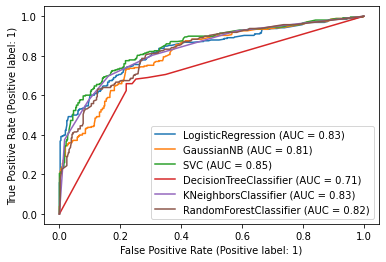

In [138]:
plt.figure(figsize = (20,20))
disp = plot_roc_curve (lg, x_train, y_train )
plot_roc_curve (gnb, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (rfc, x_train, y_train, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

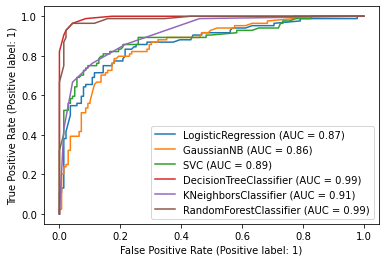

In [139]:
disp = plot_roc_curve (lg, x_test, y_test )
plot_roc_curve (gnb, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (rfc, x_test, y_test, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

As per the graph and ROC auc score - Random Forest Classifier is the best Model for the dataset with AUC = 0.95 and roc_auc_score = 0.99

# Hyper parameter tuning 

Tuning Decision Tree Classifier 

In [141]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [142]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [143]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

78.47533632286996


In [144]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']